In [2]:
import numpy as np
import matplotlib.pyplot as plot
from keras import models,layers,optimizers,datasets,utils,losses
from scipy import ndimage
from keras.applications.vgg16 import preprocess_input,VGG16
from keras.preprocessing.image import img_to_array, array_to_img

# Data Pre-processing for VGG16 Only for 1024 training and 200 test sets

In [3]:
(xtrain,ytrain),(xtest,ytest)= datasets.mnist.load_data( )
X_train,Y_train,X_test,Y_test = xtrain[:1024],ytrain[:1024],xtest[:200],ytest[:200]
X_train=X_train.reshape(1024,28,28,1)/255
X_test=X_test.reshape(200,28,28,1)/255
Y_train=utils.to_categorical(Y_train,10)
Y_test=utils.to_categorical(Y_test,10)

# Zoom All the images 3 Times

In [10]:
new_x_train=np.asarray([ndimage.zoom(train_image,3) for train_image in X_train])
new_x_test=np.asarray([ndimage.zoom(test_image,3) for test_image in X_test])

In [8]:
Y_train.shape
X_train= X_train.reshape(1024,784)
X_train.shape

(1024, 784)

In [83]:
print("Shape of Training Set" + str(new_x_train.shape))

Shape of Training Set(1024, 84, 84, 3)


# Creation Of VGG16 model

In [127]:
vgg_model=VGG16(weights='imagenet',input_shape=(84,84,3),include_top=False)

# Turning off the All the layers

In [128]:
for layer in vgg_model.layers[:-2]:
    layer.trainable = True
for i, layer in enumerate(vgg_model.layers):
   print(i, layer.name)

0 input_8
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


# Predicting features of train and test without training any layers

In [129]:
features_train = vgg_model.predict(np.array(new_x_train), batch_size= 16, verbose=1)

64/64 [==============================] - 24s 381ms/step


In [130]:
features_test = vgg_model.predict(np.array(new_x_test), batch_size=16, verbose=1)

13/13 [==============================] - 4s 342ms/step


In [131]:
print("Shape of feature train " + str(features_train.shape))
print("Shape of feature test" + str(features_test.shape))

Shape of feature train (1024, 2, 2, 512)
Shape of feature test(200, 2, 2, 512)


# Flatten the train and test features to feed into the model

In [132]:
flatten_train_feature = np.reshape(features_train, (1024, 2*2*512))
flatten_test_feature = np.reshape(features_test, (200, 2*2*512))

# Creating Dense Layers and Compiling it 

In [133]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_dim=(2*2*512)))
model.add(layers.Dense(512, activation='relu',input_dim=(2*2*512)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

# Fit the model

In [134]:
model_fit=model.fit(flatten_train_feature,Y_train,epochs=10,validation_data=(flatten_test_feature,Y_test))

Epoch 1/10
32/32 [==============================] - 0s 14ms/step - loss: 1.0672 - accuracy: 0.6836 - val_loss: 0.3849 - val_accuracy: 0.8750
Epoch 2/10
32/32 [==============================] - 0s 12ms/step - loss: 0.2838 - accuracy: 0.9141 - val_loss: 0.1804 - val_accuracy: 0.9650
Epoch 3/10
32/32 [==============================] - 0s 12ms/step - loss: 0.1409 - accuracy: 0.9521 - val_loss: 0.1626 - val_accuracy: 0.9450
Epoch 4/10
32/32 [==============================] - 0s 12ms/step - loss: 0.1384 - accuracy: 0.9580 - val_loss: 0.1578 - val_accuracy: 0.9500
Epoch 5/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0543 - accuracy: 0.9873 - val_loss: 0.1179 - val_accuracy: 0.9750
Epoch 6/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0209 - accuracy: 0.9961 - val_loss: 0.1056 - val_accuracy: 0.9750
Epoch 7/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9650
Epoch 8/10
32

# Training and Test accuracy for VGG16 by training Dense Layers

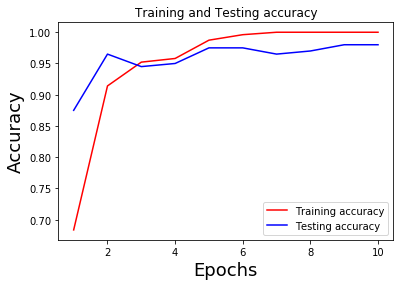

In [135]:
epochs = range(1, len(model_fit.history['accuracy']) + 1)
plot.title('Training and Testing accuracy')
plot.plot(epochs, model_fit.history['accuracy'], 'red', label='Training accuracy')
plot.plot(epochs, model_fit.history['val_accuracy'], 'blue', label='Testing accuracy')
plot.xlabel('Epochs',size=18)
plot.ylabel('Accuracy',size=18)
plot.legend()
plot.show()

# Vgg model on 60,000 Training Samples and 10,000 Testing Samples

## Data preprocessing stage

In [3]:
(xtrain,ytrain),(xtest,ytest)= datasets.mnist.load_data()
xtrain=xtrain.reshape(60000,28,28,1)/255
xtest=xtest.reshape(10000,28,28,1)/255
ytrain=utils.to_categorical(ytrain,10)
ytest=utils.to_categorical(ytest,10)

In [ ]:
# Belows lines of code ran once and saved the zoomed images in local it is of size of 10GB
new_x_train=np.asarray([ndimage.zoom(train_image,3) for train_image in xtrain])
new_x_test=np.asarray([ndimage.zoom(test_image,3) for test_image in xtest])
np.save('train.npy',new_x_train)
np.save('test.npy',new_x_test)

# Loading Zoomed Values and reshaping it to 48 as kernel should not die

In [4]:
new_x_train = np.load('train.npy')
new_x_test= np.load('test.npy')

In [5]:
reshaped_train_X = np.asarray([img_to_array(array_to_img(image, scale=False).resize((48,48))) for image in new_x_train])
reshaped_test_X = np.asarray([img_to_array(array_to_img(image2, scale=False).resize((48,48))) for image2 in new_x_test])

# Preprocess inputs

In [6]:
process_train = preprocess_input(reshaped_train_X)
process_test = preprocess_input(reshaped_test_X)

# Creating of VGG16 models and predicting its features

In [7]:
vgg_model=VGG16(weights='imagenet',input_shape=(48,48,3),include_top=False)

In [8]:
features_train = vgg_model.predict(np.array(process_train), batch_size= 16, verbose=1)

3750/3750 [==============================] - 540s 144ms/step


In [9]:
features_test = vgg_model.predict(np.array(process_test), batch_size=16, verbose=1)

625/625 [==============================] - 89s 142ms/step


In [11]:
flatten_train_feature = np.reshape(features_train, (60000, 1*1*512))
flatten_test_feature = np.reshape(features_test, (10000, 1*1*512))

# Add Dense layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

# Accuracy of the model is 71 percent

In [14]:
model_fit=model.fit(flatten_train_feature,ytrain,batch_size=128,epochs=100,validation_data=(flatten_test_feature,ytest))

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2005 - accuracy: 0.2110 - val_loss: 1.8755 - val_accuracy: 0.2700
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 1.8101 - accuracy: 0.3271 - val_loss: 1.7821 - val_accuracy: 0.3376
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 1.6748 - accuracy: 0.3835 - val_loss: 1.5470 - val_accuracy: 0.4526
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 1.5775 - accuracy: 0.4261 - val_loss: 1.5570 - val_accuracy: 0.4100
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.4946 - accuracy: 0.4555 - val_loss: 1.4521 - val_accuracy: 0.4525
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.4372 - accuracy: 0.4827 - val_loss: 1.3718 - val_accuracy: 0.4897
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 1.3780 - accuracy: 0.5075 - val_loss: 1.3117 - val_accuracy: 0.5456

Epoch 58/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8658 - accuracy: 0.7008 - val_loss: 0.8368 - val_accuracy: 0.7051
Epoch 59/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8649 - accuracy: 0.6979 - val_loss: 0.8519 - val_accuracy: 0.7014
Epoch 60/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8625 - accuracy: 0.6984 - val_loss: 0.8707 - val_accuracy: 0.6898
Epoch 61/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8581 - accuracy: 0.6998 - val_loss: 0.8771 - val_accuracy: 0.6941
Epoch 62/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8582 - accuracy: 0.6997 - val_loss: 0.8420 - val_accuracy: 0.7041
Epoch 63/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8538 - accuracy: 0.7020 - val_loss: 0.8498 - val_accuracy: 0.7053
Epoch 64/100
469/469 [==============================] - 3s 7ms/step - loss: 0.8548 - accuracy: 0.7005 - val_loss: 0.8124 - val_accuracy:

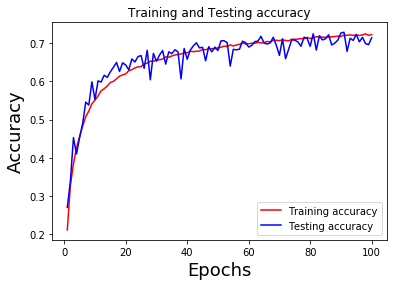

In [16]:
epochs = range(1, len(model_fit.history['accuracy']) + 1)
plot.title('Training and Testing accuracy')
plot.plot(epochs, model_fit.history['accuracy'], 'red', label='Training accuracy')
plot.plot(epochs, model_fit.history['val_accuracy'], 'blue', label='Testing accuracy')
plot.xlabel('Epochs',size=18)
plot.ylabel('Accuracy',size=18)
plot.legend()
plot.show()

# MLP Network

In [23]:
xtrain = xtrain[0:1024]
ytrain = ytrain[0:1024]
xtest = xtest[0:307]
ytest = ytest[0:307]


In [24]:
xtrain=xtrain.reshape(1024,784)/255
xtest=xtest.reshape(307,784)/255
ytrain=utils.to_categorical(ytrain,10)
ytest=utils.to_categorical(ytest,10)

# Creating Dense Layers

In [25]:
inputs = layers.Input(shape=(784,))
x = layers.Dense(128,activation='relu')(inputs)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dense(128,activation='relu')(x)

outputs=layers.Dense(10,activation='softmax')(x)
model = models.Model(inputs=inputs,outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, validation_data=(xtest,ytest))
score = model.evaluate(xtest, ytest)
print('Test loss: ', score[0], 'Test accuracy: ', score[1])

Epoch 1/10
8/8 [==============================] - 0s 17ms/step - loss: 2.1969 - accuracy: 0.2920 - val_loss: 1.9935 - val_accuracy: 0.5733
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 1.5253 - accuracy: 0.6309 - val_loss: 1.2875 - val_accuracy: 0.5635
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8153 - accuracy: 0.7715 - val_loss: 0.7325 - val_accuracy: 0.7687
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5377 - accuracy: 0.8398 - val_loss: 0.5827 - val_accuracy: 0.7948
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8682 - val_loss: 0.5959 - val_accuracy: 0.7980
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.9131 - val_loss: 0.4164 - val_accuracy: 0.8762
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2116 - accuracy: 0.9424 - val_loss: 0.3893 - val_accuracy: 0.8990
Epoch 8/10
8/8 [=================

# Evaluation of MLP dataset

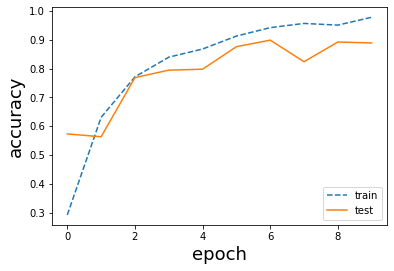

In [27]:
plot.plot(history.history['accuracy'], '--')
plot.plot(history.history['val_accuracy'])
plot.xlabel('epoch',size=18)
plot.ylabel('accuracy',size=18)
plot.legend(['train', 'test'], loc='lower right')
plot.show()

# CNN Network

# Data preprocessing

In [32]:
#-- CNN with 60000 data

(xtrain,ytrain),(xtest,ytest)= datasets.mnist.load_data( )

xtrain = xtrain[0:1024]
ytrain = ytrain[0:1024]
xtest = xtest[0:307]
ytest = ytest[0:307]

xtrain=xtrain.reshape(1024,28,28,1)/255
xtest=xtest.reshape(307,28,28,1)/255
ytrain=utils.to_categorical(ytrain,10)
ytest=utils.to_categorical(ytest,10)

# Convo Layers

In [35]:
inputs = layers.Input(shape=(28,28,1,))
x = layers.Conv2D(64,kernel_size=(3,3),activation='relu')(inputs)
x = layers.Conv2D(128,kernel_size=(3,3),activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)
# x =layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(126,activation='relu')(x)
# x =layers.Dropout(0.5)(x)
outputs=layers.Dense(10,activation='softmax')(x)
model = models.Model(inputs=inputs,outputs=outputs)

model.compile(loss=losses.categorical_crossentropy,optimizer=optimizers.Adadelta(),metrics=['accuracy'])
history=model.fit(xtrain,ytrain,batch_size=64,epochs=100,validation_data=(xtest,ytest))
score = model.evaluate(xtest,ytest)
print(score[0])
print(score[1])

Epoch 1/100
16/16 [==============================] - 3s 176ms/step - loss: 2.3004 - accuracy: 0.0723 - val_loss: 2.2980 - val_accuracy: 0.1173
Epoch 2/100
16/16 [==============================] - 3s 170ms/step - loss: 2.2929 - accuracy: 0.1123 - val_loss: 2.2925 - val_accuracy: 0.1433
Epoch 3/100
16/16 [==============================] - 3s 186ms/step - loss: 2.2852 - accuracy: 0.1924 - val_loss: 2.2868 - val_accuracy: 0.1987
Epoch 4/100
16/16 [==============================] - 3s 172ms/step - loss: 2.2775 - accuracy: 0.3057 - val_loss: 2.2808 - val_accuracy: 0.2508
Epoch 5/100
16/16 [==============================] - 3s 171ms/step - loss: 2.2694 - accuracy: 0.3965 - val_loss: 2.2743 - val_accuracy: 0.3094
Epoch 6/100
16/16 [==============================] - 3s 192ms/step - loss: 2.2611 - accuracy: 0.4502 - val_loss: 2.2676 - val_accuracy: 0.3616
Epoch 7/100
16/16 [==============================] - 3s 175ms/step - loss: 2.2525 - accuracy: 0.4951 - val_loss: 2.2606 - val_accuracy: 0.4137

Epoch 58/100
16/16 [==============================] - 3s 183ms/step - loss: 1.1122 - accuracy: 0.8193 - val_loss: 1.2546 - val_accuracy: 0.7492
Epoch 59/100
16/16 [==============================] - 3s 186ms/step - loss: 1.0860 - accuracy: 0.8242 - val_loss: 1.2301 - val_accuracy: 0.7557
Epoch 60/100
16/16 [==============================] - 3s 182ms/step - loss: 1.0603 - accuracy: 0.8271 - val_loss: 1.2061 - val_accuracy: 0.7524
Epoch 61/100
16/16 [==============================] - 3s 180ms/step - loss: 1.0357 - accuracy: 0.8252 - val_loss: 1.1828 - val_accuracy: 0.7557
Epoch 62/100
16/16 [==============================] - 3s 194ms/step - loss: 1.0115 - accuracy: 0.8242 - val_loss: 1.1600 - val_accuracy: 0.7590
Epoch 63/100
16/16 [==============================] - 3s 183ms/step - loss: 0.9884 - accuracy: 0.8281 - val_loss: 1.1379 - val_accuracy: 0.7687
Epoch 64/100
16/16 [==============================] - 3s 186ms/step - loss: 0.9661 - accuracy: 0.8271 - val_loss: 1.1165 - val_accuracy:

# Evaluation Of CNN Model

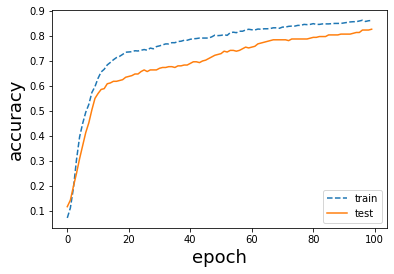

In [36]:
plot.plot(history.history['accuracy'], '--')
plot.plot(history.history['val_accuracy'])
plot.xlabel('epoch',size=18)
plot.ylabel('accuracy',size=18)
plot.legend(['train', 'test'], loc='lower right')
plot.show()